In [ ]:
import numpy as np
import pandas as pd
import pyper as pr
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
r = pr.R(use_numpy='True', use_pandas='True')
r('load("data/data.RData")')
data = pd.Series(r.get('data'))
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
dtype: float64

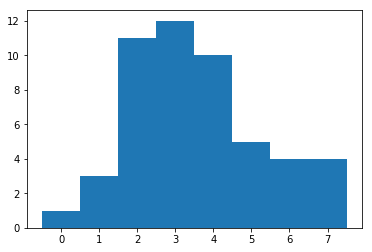

In [13]:
plt.hist(data, bins=np.arange(-0.5, 8.5, 1))
plt.show()

In [17]:
variance = np.var(data, ddof=1) # ddof : N-ddof(不偏分散）
sd = np.std(data, ddof=1)
print(variance)
print(sd)

2.986122448979592
1.728040060004279


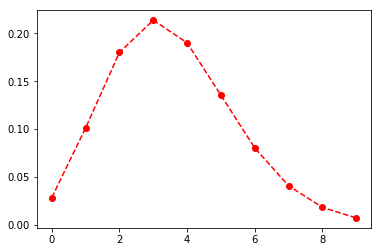

In [22]:
y = np.arange(0, 10)
prob=pd.Series(stats.poisson.pmf(y, np.average(data)), index=y)
plt.plot(prob, 'o--', color='red')
plt.show()

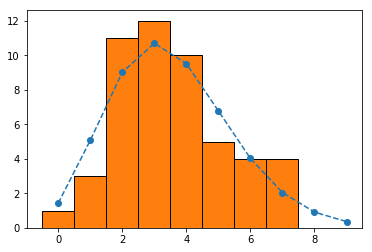

In [26]:
plt.plot(prob*50, 'o--')
plt.hist(data, bins=np.arange(-0.5, 8.5, 1),ec='black')
plt.show()

# Poisson Distribution
$$ p(y|\lambda)=\frac{\lambda^y exp(-\lambda)}{y!} $$

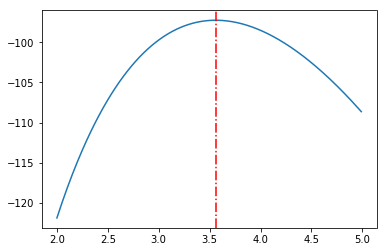

In [51]:
lmd = np.arange(2.0, 5.0, 0.01)
logL = np.array([sum(stats.poisson.logpmf(data, i)) for i in lmd])
logL
plt.plot(lmd, logL)
plt.axvline(x=lmd[np.argmax(logL)], color='r', linestyle='dashdot')
plt.show()